<div style="border:solid Chocolate 2px; padding: 40px">
    
 <b>Добрый день, Александр!</b>
Меня зовут Ксения Цыганова, и я буду комментировать твою работу и помогать тебе сделать ее сильнее. В Практикуме мы общаемся на «ты», но если тебе это будет некомфортно, пожалуйста, скажи, и мы будем обращаться друг к другу на «вы».
    
Все мои комментарии делятся на три вида:

    
👍 Здесь все отлично, идем дальше! - <font color='green'> зеленый цвет </font>
    
💡 Все хорошо, однако, можно оптимизировать или рассмотреть другие способы (необязательно для исполнения, чтобы пройти дальше) - <font color='gold'>желтый цвет</font>
    
🤔 Необходимо внести исправления, без которых я не смогу принять проект - <font color='red'>красный цвет</font>
    
    
Свои комментарии я буду выделять заголовком «комментарий ревьюера». Пожалуйста, не удаляй их, это поможет сократить время проверки на повторных ревью.Ты также можешь писать свои комментарии к моим и выделять их любым понравившимся способом, отличным от моего. Если у тебя будут возникать вопросы в течение нашей работы, я с радостью на них отвечу.

Цель моего ревью не критика и не возможность дать тебе готовые ответы, это способ привести тебя в нужное русло, чтобы ты смог развить собственные идеи и решения. Твой будущий работодатель будет поступать похожим образом. 
        
   <b>У тебя все получится!</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler#%%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from catboost import Pool, CatBoostRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import cross_val_score


/Users/trupolog/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что все импорты собраны в одном месте в начале проекта. Это поможет в случае чего сразу увидеть, какие библиотеки следует доустановить.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Стоит учитывать рекомендации PEP-8 при оформлении проекта, в том числе импортов. С ними можно познакомиться по ссылке: https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости.

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть вступительный комментарий.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Также можно добавить содержание для более легкой навигации по проекту.

## Подготовка данных

Загрузим данные и сделаем первичный осмотр.

In [2]:
data = pd.read_csv('../datasets/autos.csv')
data

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Для загрузки данных можно использовать библиотеку os или констукцию try/except. Это поможет работать работать с проектом как локально, так и через Jupyter Hub, не внося дополнительных правок.
        
Также была ошибка в пути к файлу, я поправила. Пожалуйста, в следующий раз, будь более внимателен к этому.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Данные не в чистом виде, присутсвуют как и ошибки приведения типов, так и пропуски в данных, будем исправлять!

In [4]:
data.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что используешь средства для знакомства с основными характеристиками датасета.

Проанализируем конкретно в каких признаках у нас имеются пропуски.

In [5]:
data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
Repaired             71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

Первым делом исправим самую явную ошибку приведения типов - признак *Repaired*, его следует привести к типу Bool, предварительно заполним пропуски значением False, так как если поле пустой - скорее всего пользователи имели в виду, что она не чинилась, поэтому ничего и не вводили.

In [6]:
tmp_repaired = [True if i == 'yes' else False for i in data['Repaired']]

In [7]:
data['Repaired'] = tmp_repaired

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    
Здесь согласна с заполнением.

Удалим признаки: *NumberOfPictures* - он содержит только нули и никакой информации не несёт, *DateCrawled*, *DateCreated*, *LastSeen*, *PostalCode* - признаки, никак не влияющие на цену.

In [8]:
data = data.drop(["DateCrawled","DateCreated","LastSeen","NumberOfPictures","PostalCode"], axis=1)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что удаляешь неинформативные признаки.

С остальными признаками чуть тяжелее - они все категориальные. Конечно, можно попытаться восстановить их на основе других данных, например восстановить тип техники по бренду и мощности двигателя, но такую группировку лучше согласовывать с заказчиком или спросить у более опытных коллег. Поэтому пока заполним пропуски "unknown".

In [9]:
data['VehicleType'] = data['VehicleType'].fillna('unknown')
data['Gearbox'] = data['Gearbox'].fillna('unknown')
data['Model'] = data['Model'].fillna('unknown')
data['FuelType'] = data['FuelType'].fillna('unknown')

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика </b></font>
<div>Обработал аномальные значения и выбросы.</div>
</div>

Настало время разобраться с аномальными значениями.

In [10]:
data.loc[data['RegistrationMonth'] == 0, 'RegistrationMonth'] = 1
data.loc[data['Power'] > 3000, 'Power'] = 3000
data["RegistrationYear"] = data["RegistrationYear"].where(data["RegistrationYear"] < 2022, 2022)
data["RegistrationYear"] = data["RegistrationYear"].where(data["RegistrationYear"] > 1940, 1940)

Теперь разберемся с выбросами. Построим диаграмму размаха и оценим ситуацию.

(-50.0, 20000.0)

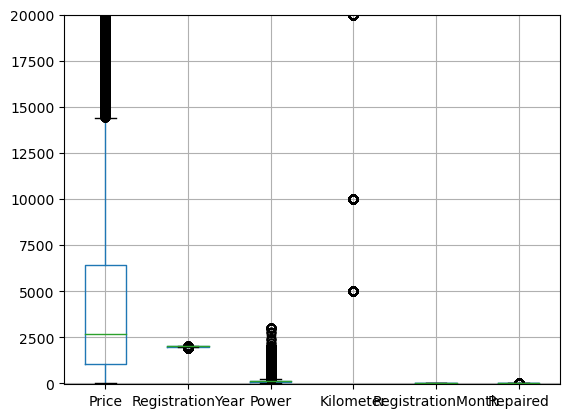

In [11]:
data.boxplot()
plt.ylim(-50, 20000)

Как оказалось, выбросов очень много, нужно обрабатывать в признаках *Price* и *Power*.


Обработаем выбросы.

In [12]:
count = 0
index_del = []
for column in ["Price","Power"]:
    q25=np.array(data[column].quantile(0.25))
    q75=np.array(data[column].quantile(0.75))
    first_part=q25-1.5*(q75-q25)
    second_part=q75+1.5*(q75-q25)
    for index_value, value in zip(data[column].index,data[column]):
        if second_part <= value or value <= first_part:
            index_del.append(index_value)
    count += len(index_del)
    data = data.drop(index_del, axis = 0)
    index_del = []

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что пишешь обоснование.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Также можно использовать визуализацию для отображения корреляционной зависимости между численными признаками.
        
Можно посмотреть на распределения признаков, на боксплоты. Более подробно изучить уникальные значения.
        
Признак Kilometer, например, обладает только строго определенными значениями. Возможно, это связано с особенностями заполнения анкеты. В данном случае можно считать, что признак категориальный.
        
Также можно проверить данные на дубликаты.
        

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Из обязательного, что здесь нужно сделать, - это не только обработать пропуски, но также и аномальные значения в численных признаках.

## Обучение моделей

Для начала закодируем все категориальные переменные OneHotEncoding.

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика</b></font>
<div>Добавил OrdinalEncoder для работы с LightGBM</div>
</div>

In [13]:
data_ohe = pd.get_dummies(data, drop_first=True)
encoder = OrdinalEncoder()
encoder.fit(data)
data_ordinal = pd.DataFrame(encoder.fit_transform(data),
                            columns=data.columns)


<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
В теории тренажера в данный момент предлагается использовать get_dummies, однако, это впоследствии приводит к сложностям поэтому стоит использовать класс <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">OHE из sklearn</a>. По аналогии с масштабированием делать fit только на трейне, а transform на всех выборках.
<hr>
get_dummies подходит для анализа данных, а для машинного обучения более предпочтителен OHE, т.к. он позоволяет избежать ряд ошибок при обучении моделей, в том числе может работать с неизвестными ранее уровнями категорий, которых не было изначально (например, если появится еще одна модель машины).
        
get_dummies также нельзя использовать вместе с pipeline, column_transformer, ecли появляется новая выборка и ее нужно кодировать, то обязательно стоит выполнить проверку, чтобы получившиеся фичи были такие же.
        
Прочитать об этом более подробно можно здесь:

https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing

Разделим на фичи и таргет.

In [14]:
features = data_ohe.drop('Price', axis=1)
target = data_ohe['Price']

Теперь поделим данные на обучающую и тестовую выборки в соотношении 3:1.

In [15]:
features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe = train_test_split(features, target, test_size=0.2, random_state=12345)

features_train_cat, features_test_cat, target_train_cat, target_test_cat = train_test_split(data.drop('Price', axis=1), data['Price'], test_size=0.2, random_state=12345)

features_train_ordinal, features_test_ordinal, target_train_ordinal, target_test_ordinal = train_test_split(data_ordinal.drop('Price', axis=1), data_ordinal['Price'], test_size=0.2, random_state=12345)

Теперь приступим к обучению моделей, начнём с малого - Линейная Регрессия. Но для начала - отмасштабируем данные.

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 330237 entries, 0 to 354368
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Price              330237 non-null  int64 
 1   VehicleType        330237 non-null  object
 2   RegistrationYear   330237 non-null  int64 
 3   Gearbox            330237 non-null  object
 4   Power              330237 non-null  int64 
 5   Model              330237 non-null  object
 6   Kilometer          330237 non-null  int64 
 7   RegistrationMonth  330237 non-null  int64 
 8   FuelType           330237 non-null  object
 9   Brand              330237 non-null  object
 10  Repaired           330237 non-null  bool  
dtypes: bool(1), int64(5), object(5)
memory usage: 28.0+ MB


<div class="alert alert-info">
<font size="5"><b>Комментарий ученика</b></font>
<div>Выполнил масштабирование!


ТАКЖЕ ВО ВСЕХ БЛОКАХ ПОМЕНЯЛ ПРЕДИКТ НА ОБУЧАЮЩЕЙ ВЫБОРКЕ ВМЕСТО ТЕСТОВОЙ.
</div>
</div>

In [17]:
# numeric = ['RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth']
# scaler = StandardScaler()
# scaler.fit(features_train_ohe[numeric])
# features_train_scaled = features_train_ohe
# features_test_scaled = features_test_ohe
# features_train_scaled[numeric] = scaler.transform(features_train_ohe[numeric])
# features_test_scaled[numeric] = scaler.transform(features_test_ohe[numeric])

In [18]:
# %%time
#
# model_regression = LinearRegression()
#
# model_regression.fit(features_train_scaled, target_train_ohe)
# scores = cross_val_score(model_regression, features, target, cv=5, verbose=True, n_jobs=-1, scoring='neg_root_mean_squared_error')
# final_score = sum(scores) / len(scores)
#
# print('Средняя оценка качества модели:', final_score)

In [19]:
# %%time
#
# print('RMSE:', mean_squared_error(y_true=target_train_ohe, y_pred=model_regression.predict(features_train_scaled), squared=False))

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
    
1. Перед использованием линейной регрессии стоит отмасштабировать численные признаки.
    
2. Кроме того, если ты делишь данные только на 2 выборки (трейн и тест) без валидационной выборки, то стоит качество моделей проверять на кросс-валидации, а время на предикт измерять на тренировочной выборке. 
    
3. Для каждой исследуемой модели стоит отдельно измерить время на fit и на predict
    
4. Тестовая выборка нужна только для того, чтобы в конце анализа, после того, как выбрана лучшая модель, проверить ее на тесте. Мы не сравниваем качество моделей на тестовой выборке. Так как тестовая выборка нужна для иммитации новых данных.

Теперь воспользуемся случайным лесом с подбором гипперпараметров.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Для моделей на основе деревьев решений  можно использовать порядковое кодирование. 

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Лучшие параметры: {'max_depth': 40, 'n_estimators': 9}
Лучший счет: -1812.5861995571854

In [20]:
# model_forest = RandomForestRegressor(random_state=12345)
# params = {'max_depth': range (10, 41, 10), 'n_estimators': range(1, 11, 2)}
# grid = GridSearchCV(model_forest, params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1, verbose=10)
# grid.fit(features_train, target_train)
# print('Лучшие параметры:', grid.best_params_)
# print('Лучший счет:', grid.best_score_)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что перебираешь параметры.

In [21]:
%%time
#**grid.best_params_
model_forest = RandomForestRegressor(random_state=42, n_estimators = 100, n_jobs=-1, criterion='mse')
model_forest.fit(features_train_ohe, target_train_ohe)

/Users/trupolog/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


CPU times: user 7min 12s, sys: 5.76 s, total: 7min 17s
Wall time: 58.5 s


RandomForestRegressor(criterion='mse', n_jobs=-1, random_state=42)

In [22]:
%%time
predictions_forest = model_forest.predict(features_train_ohe)

CPU times: user 21.4 s, sys: 1.63 s, total: 23 s
Wall time: 7.32 s


In [23]:
print('RMSE:', mean_squared_error(y_true=target_train_ohe, y_pred=predictions_forest, squared=False))

RMSE: 694.353269185088


Теперь воспользуемся *Catboost*.


bestTest = 1725.410008
bestIteration = 999

CPU times: user 1h 29min 6s, sys: 6min 4s, total: 1h 35min 11s
Wall time: 17min 1s

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика</b></font>
<div>Не стал запускать CatBoost так как сейчас нахожусь с другого устройства и будет обучаться очень долго:(
</div>
</div>

In [24]:
# %%time
# catboost = CatBoostRegressor(loss_function='RMSE')
# parameters_cat = {'depth':[5,10], 'learning_rate':np.arange(0.1,1,0.2)}
# catboost_grid = catboost.grid_search(parameters_cat,
#                                      Pool(features_train_cat, target_train_cat, cat_features=["VehicleType","Gearbox",
#                                                                                       "Model","FuelType",
#                                                                                       "Brand","Repaired"]),
#                                      cv=3,
#                                      verbose=True,
#                                      plot=False)

In [25]:
model_catboost = CatBoostRegressor(depth=catboost_grid["params"]["depth"],
                                    learning_rate=catboost_grid["params"]['learning_rate'], loss_function='RMSE')
model_catboost.fit(features_train_cat, target_train_cat, cat_features=["VehicleType","Gearbox",
                                                              "Model","FuelType",
                                                              "Brand","Repaired"])


NameError: name 'catboost_grid' is not defined

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что для CatBoost используешь незакодированные заранее фичи, чтобы использовать внутренний алгоритм кодирования.

In [ ]:
%%time
predictions_cat = model_catboost.predict(features_train_cat)
print('RMSE:', mean_squared_error(y_true=target_train_cat, y_pred=predictions_cat, squared=False))

In [ ]:
target_train_ordinal

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика</b></font>
<div>Исправил на Ordinal.
</div>
</div>

In [26]:
%%time

import lightgbm as lgb
lgb_train = lgb.Dataset(features_train_ordinal, target_train_ordinal)
lgb_test = lgb.Dataset(features_test_ordinal, target_test_ordinal, reference=lgb_train)
parameters_light = {'metric': 'l2', 'max_depth':10,"random_state": 42,"learning_rate":0.1}
light = lgb.train(parameters_light,
                  lgb_train,
                  num_boost_round=1000,
                  valid_sets=[lgb_train, lgb_test],
                  verbose_eval=100)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 655
[LightGBM] [Info] Number of data points in the train set: 264189, number of used features: 10
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Start training from score 1176.847397
[100]	training's l2: 136541	valid_1's l2: 137763
[200]	training's l2: 127438	valid_1's l2: 131158
[300]	training's l2: 121990	valid_1's l2: 127832
[400]	training's l2: 118125	valid_1's l2: 125837
[5

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть анализ LightGBM

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Для LightGBM стоит исключить использование one-hot кодиярования категориальных переменных. 
    
Можно использовать внутренний алгоритм кодирования, как для CatBoost, то есть подавать модели незакодированны ранее фичи в соответствии с документацией, либо использовать порядковое кодирование.

In [27]:
%%time
print("LightGBM:",(mean_squared_error(target_train_ordinal,light.predict(features_train_ordinal),squared=False)))

LightGBM: 323.55562100673916
CPU times: user 13.5 s, sys: 192 ms, total: 13.7 s
Wall time: 1.68 s


## Анализ моделей

Были обучены 4 модели: Линейная Регрессия, Случайный Лес, CatBoost и LightGBM. Начнем по порядку: наименьшую ошибку показал CatBoost - 1703, следом идёт LightGBM - 1719, затем Случайный Лес - 1747, а уже потом Линейная Регрессия - 3207. Разница между бустингом и регрессией колосальна. А вот разница между тремя первыми местами не сильно заметна, особенно если рассматривать только бустинги - всего в 16 евро.

Критерии, которые важны заказчику:
-качество предсказания;
-время обучения модели;
-время предсказания модели.


Отбросим линейную регрессии в силу ее слабой RMSE и за каждый критерий будем давать от 0 до 2 баллов за позицию в критериях.
Качество предсказания: CatBoost - 2 балла, LightGBM - 1 балл, Случайный Лес - 0 баллов.
Время обучения модели: CatBoost - 0 баллов, LightGBM - 2 балл, Случайный Лес - 1 балла.
Время предсказания модели: CatBoost - 2 балла, LightGBM - 1 балл, Случайный Лес - 0 баллов.

Таким образом у CatBoost - 4 балла, у LightGBM - 4 балла и у Случайного Лесса 1 балл.
Но в данном случае выбор падет на LightGBM, так как уж намного быстрее эта модель обучилась в отличие от CatBoost.

<div class="alert alert-info">
<font size="5"><b>Комментарий ученика</b></font>
<div>Проверил лучшую модель на ТЕСТОВОЙ.
</div>
</div>

Отличный результат!

In [ ]:
print("LightGBM:",(mean_squared_error(target_test_ordinal,light.predict(features_test_ordinal),squared=False)))

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
    
Отлично, что сводишь все полученные результаты в одном месте.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
    
Вот здесь, после того, как выбрал лучшую модель, стоит проверить ее на тестовой выборке. Везде выше по проекту стоит исключить использование тестовой выборки.

## Вывод

Была проведена работа по обработке данных, обучению модель и анализа лучшей. В самом начале мы первично изучали данные и начали их обрабатывать - было много пропусков и не все признаки соответствовали своим типам. После разбили данные на обучающую и тестовую выборки несколько раз, так как разные модели могут принимать на вход только определенные данные - некоторые уже закодированные, а некоторые могут принимать и не закодированные данные. Обучив и проверив модели на тестовых выборках - стало ясно, что линейная регрессия такая себе модель для данной задачи, а после сравнительного анализа стало ясно, что лучшая модель в нашем случае - LightGBM!

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть резюмирующий вывод.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Здесь я оставлю несколько интересных и полезных ссылок по теме:
        
        
1. "XGBoost, LightGBM or CatBoost — which boosting algorithm should I use?"

https://medium.com/riskified-technology/xgboost-lightgbm-or-catboost-which-boosting-algorithm-should-i-use-e7fda7bb36bc
        
        
2. "Transforming categorical features to numerical features"
        
https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic
        
        
3. "Градиентный Бустинг: самый частый вопрос на собеседовании на дата саентиста"
        
https://www.youtube.com/watch?v=ZNJ3lKyI-EY
        
4. "Tutorial: CatBoost Overview"
        
https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview/notebook
        
5. "Gradient Boosting from scratch"
        
https://blog.mlreview.com/gradient-boosting-from-scratch-1e317ae4587d

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту</b>

Александр, благодарю тебя за работу! Проект отличный, продуманный, структурно выдержанный и аккуратный. Видно, что ты вдумчиво подходишь к работе. Однако стоит внести некоторые исправления, чтобы можно было считать проект завершенным.

**Положительные моменты проекта, которые хочу еще раз подчеркнуть:**

1. Удалены все лишние признаки и константный признак
2. Есть промежуточные выводы по ходу анализа признаков
3. Есть обработка пропущенных значений
4. Кодирование категориальных признаков осуществляется.
5. Есть анализ времени предсказания и обучения моделей, а также их качества
6. Предложена модель с учетом времени обучения и предсказания, а также качества работы
7. Использованы разные методы кодирования категориальных переменных.
    
**Замечания, на которые стоит обратить внимание при будущей работе:**
    
    1. Стоит обработать аномальные значения в данных
    2. Для LightGBM стоит использовать соответствующий метод кодирования
    3. Время предсказания, когда есть только тренировочная и тестовая выборки, стоит измерять на тренировочной выборке
    4. Модели выбирать по результатам кросс-валидации
    5. На тестовой выборке стоит проверять только лучшую модель.
    6. Для использования линейной регрессии стоит отмасштабировать численные признаки

    
    
Остальные комментарии ты найдешь выше.

**Желаю удачи и жду твой проект на повторное ревью!**

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнена загрузка и подготовка данных
- [x]  Выполнено обучение моделей
- [x]  Есть анализ скорости работы и качества моделей